<a href="https://colab.research.google.com/github/ceylonai/youtube_notes/blob/master/Day3/SymbolicAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Symbolic artificial intelligence 
*classical AI, rule-based AI, good old-fashioned AI*


## **Meaning, Definition, Explanation**

Symbolic artificial intelligence is the term for the collection of all methods in artificial intelligence research that are based on high-level "symbolic" (human-readable) representations of problems, logic and search. Symbolic 
[link text](https://)

> Indented block


AI was the dominant paradigm of AI research from the mid-1950s until the late 1980s.


## Components

1. Human readable symbolics
2. Logic
3. Search

***In machine learning, the algorithm learns rules as it establishes correlations between inputs and outputs. In symbolic reasoning, the rules are created through human intervention and then hard-coded into a static program.***

#What is Expert system

A piece of software which use experts knowloage to offer advice or make decisions in such as medical diagnosis

## Simply we are going to intergrate domain experts expirence into our program


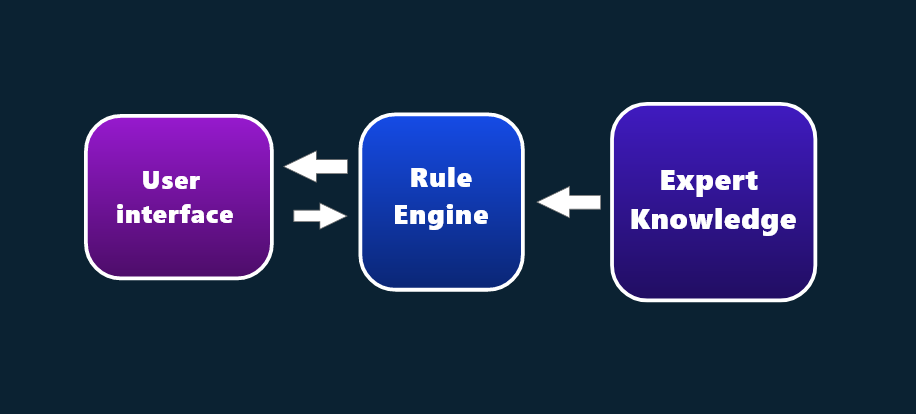

#Important characteristic of Expert System



*   The Highest Level of Expertise
*   Right on Time Reaction
*   Good Reliability
*   Flexible
*   Effective Mechanism
*   Capable of handling challenging decision & problems






# Applications of expert systems

*   Information management
*   Hospitals and medical facilities
*   Loan analysis
*   Planning and scheduling
*   Help desks management



## How to develop expert systems

1. CLIPS (Since 1985)
2. Pyknow
3. experta

In [ ]:
!pip install experta

In [ ]:
from experta import Fact,KnowledgeEngine,Rule,AS

class Light(Fact):
  pass

class ColorLightResponseEngine(KnowledgeEngine):

  @Rule(Light(color="red"))
  def red(self):
    print("You can not GO now")
  
  @Rule(Light(color="green"))
  def green(self):
    print("You can GO now")

  @Rule(AS.light << Light(color="yellow")|Light(color="blinking-yellow"))
  def yellow(self,light):
    print(f"You can GO But be carrefull becouse light is {light['color']}")


In [ ]:
engine = ColorLightResponseEngine()

In [ ]:
engine.reset()
from random import choice
color_light_status = Light(color=choice(["red","green","yellow","blinking-yellow"]))
print("Color light is ",color_light_status['color'])
engine.declare(color_light_status)
engine.run()

Color light is  green
You can GO now


In [ ]:
from functools import partial, reduce
from itertools import takewhile
import operator as op

from experta import *


class Number(Fact):
    pass


class Letter(Fact):
    pass


class Combination(Fact):
    pass

until_none = partial(takewhile, lambda x: x is not None)


def check_combination(d=None, t=None, l=None, r=None, a=None,
                      e=None, n=None, b=None, o=None, g=None):
    """Check a partial solution."""

    left_1 = list(until_none(reversed([g, e, r, a, l, d])))
    left_2 = list(until_none(reversed([d, o, n, a, l, d])))
    right = list(until_none(reversed([r, o, b, e, r, t])))

    a = sum((l[0] * 10 ** e) + (l[1] * 10 ** e)
            for e, l in enumerate(zip(left_1, left_2)))
    b = sum((l * 10 ** e) for e, l in enumerate(right))

    if len(left_1) < 6:
        a = a % 10**len(right)

    return a == b


def C(name, neq=""):
    """
    Ex: name="c", neq="tar" => W("c") & ~W("t") & ~W("a") & ~W("r")

    """
    if neq:
        return W(name) & reduce(op.and_, [~W(c) for c in neq])
    else:
        return W(name)


class WordGame(KnowledgeEngine):
    @Rule()
    def startup(self):
        print("The problem is")
        print("    GERALD")
        print("  + DONALD")
        print("    ------")
        print("  = ROBERT")
        print()

        for n in range(10):
            self.declare(Number(n))

        for l in set("GERALD" + "DONALD" + "ROBERT"):
            self.declare(Letter(l))

    @Rule(Number(MATCH.n),
          Letter(MATCH.l))
    def generate_combinations(self, n, l):
        self.declare(Combination(l, n))

    @Rule(Combination("D", C("d")),
          Combination("T", C("t", neq="d")),
          TEST(check_combination),
          Combination("L", C("l", neq="dt")),
          Combination("R", C("r", neq="dtl")),
          TEST(check_combination),
          Combination("A", C("a", neq="dtlr")),
          Combination("E", C("e", neq="dtlra")),
          TEST(check_combination),
          Combination("N", C("n", neq="dtlrae")),
          Combination("B", C("b", neq="dtlraen")),
          TEST(check_combination),
          Combination("O", C("o", neq="dtlraenb")),
          Combination("G", C("g", neq="dtlraenbo")),
          TEST(check_combination))
    def find_solution(self, g, e, r, a, l, d, o, n, b, t):
        print("A solution is:")
        print("  G =", g)
        print("  E =", e)
        print("  R =", r)
        print("  A =", a)
        print("  L =", l)
        print("  D =", d)
        print("  O =", o)
        print("  N =", n)
        print("  B =", b)
        print("  T =", t)
        print()
        print("    ", g, e, r, a, l, d)
        print("  + ", d, o, n, a, l, d)
        print("    ", "------")
        print("  = ", r, o, b, e, r, t)
        print()

In [ ]:


wg = WordGame()
wg.reset()
wg.run()



The problem is
    GERALD
  + DONALD
    ------
  = ROBERT

A solution is:
  G = 1
  E = 9
  R = 7
  A = 4
  L = 8
  D = 5
  O = 2
  N = 6
  B = 3
  T = 0

     1 9 7 4 8 5
  +  5 2 6 4 8 5
     ------
  =  7 2 3 9 7 0

